## Workshop week 7 -- K-means clustering

For this workshop, we will implement the K-means clustering discussed in the lecture. You are encouraged to try and write your own implementation of the algorithm, as this will also be needed for your assessment.

However, for this workshop, you are also allowed to use the `sklearn` implementation of this algorithm.

In [1]:
import numpy as np
import pandas as pd

#### Excercise 1

Download the file `kmeans.csv` from Blackboard. Load the data (containing two attributes), by completing the code snippet below.

How many samples are there in the dataset? (Having correctly loaded the data, the following cell should output the number of samples.)

You can also add a line to shuffle the samples -- this is to show that the order of training samples does not influence the result. (Not doing this should also not influence the rest of your excercises).

In [2]:
def get_data():
    # load the data:
    # ... insert code here ...
    data = pd.read_csv('kmeans.csv', header = None).values
    
    # shuffle data rows
    # ... insert code here ...
    #np.random.shuffle(data) # shuffle rows
    
    return data

In [3]:
data = get_data()
print("There are {} samples".format(len(data)))

There are 300 samples


#### Excercise 2

Visualise the data using a scatter plot.

Can you _visually determine_ the number of clusters in the data?

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

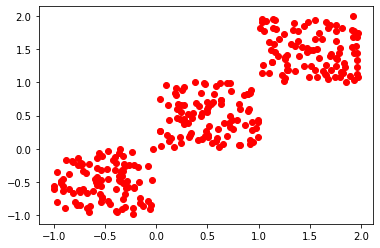

In [5]:
# show the scatter plot of the data
# ... insert code here ...
plt.scatter(data[:, 0], data[:, 1], c='r')

# plot figure
plt.show()

#### Excercise 3a

Write a a function `kmeans_clustering(data, K)` that runs the k-means algorithm on the data, and returns:
- `centroid`: the cluster centres (their coordinated)
- `distance`: the _within-cluster scatter_ of the returned clustering (sum of distances between all samples and their closest cluster centres)
- `cluster_set`: a dictionary mapping each cluster label to a list of samples associated to that cluster

(You can check that your implementation is correct in the **Excercise 3b**.)


You are encouraged to try and write your own implementation from scratch. However, for the workshop, you can also use the `sklearn` implementation of k-means, from:
`from sklearn.cluster import KMeans`

In [6]:
from sklearn.cluster import KMeans

In [7]:
# define kmeans clustering - using sklearn implementation
def kmeans_clustering(data, K):
    
    # define the model
    # (either all variables needed to run k-means -- e.g. initialise K cluster centres)
    # (or load the model from sklearn and initialise it correctly)
    # ... insert code here ...
    model = KMeans(n_clusters = K)
    
    # fit the model to the data -- calculate the clustering
    # ... insert code here ...
    model.fit(data)
    labels = model.labels_
    centroid = model.cluster_centers_
    
    # assign the points to the cluster sets
    # (note that this is not explicitly needed
    # in the implementation of the algorithm!)
    cluster_set = {}
    # ... insert code here ...
    for i,x in enumerate(data):
        xlabel = labels[i]
        if xlabel not in cluster_set.keys():
            cluster_set[xlabel] = np.reshape(x, (1, len(x)))
        else:
            cluster_set[xlabel] = np.append(cluster_set[xlabel], np.reshape(x, (1, len(x))), axis = 0)
    
    # calculate the final within-cluster scatter: distance from
    # closest each sample to closest (assigned) cluster centre
    # (to get within-cluster scatter manually:
    # go through different clusters in `cluster_set` and `centroid`s
    # sum distance of every point in the cluster_set to it's centorid
    # return the big sum of sums)
    # ... insert code here ...   
    distance = model.inertia_
            
    return centroid, distance, cluster_set

#### Excercise 3b

Run the above code with K=3 (the number of clusters determined visually in **Excercise 1**).

Show a figure with the scatter plot of each of the clusters in a different colour, and also show the calculated cluster centres.

C:\Users\sjl10\AppData\Local\Temp/ipykernel_2748/3288384578.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gX" (-> color='g'). The keyword argument will take precedence.
  plt.plot(current_centroid[0], current_centroid[1], 'gX', c='r', ms = 15)


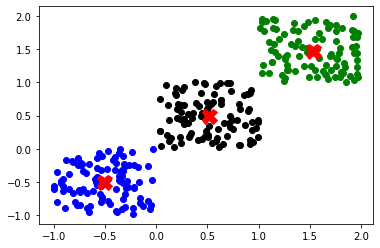

In [8]:
# call k-means on the loaded data
K = 3
centroid, _, clusters_set = kmeans_clustering(data, K)

# ...
# insert code here
# ...
colors = ['k', 'b', 'g']

for key in clusters_set.keys():
    current_cluster = clusters_set[key]
    plt.scatter(current_cluster[:, 0], current_cluster[:, 1],
                c = colors[key])
    
    current_centroid = centroid[key]
    
    plt.plot(current_centroid[0], current_centroid[1], 'g', c='r', ms = 15)


# show plot
plt.show()

#### Excercise 4

Sometimes k can't be determined visually from the data (or the data is too complex to visualise). However, we can visualise the aggregate distance over all the data.

The **aggregate distance** or **within-cluster scatter** is equal to the sum of all data points to their centroid.

Wite a code that would help you visually determined the number of clusters through examining the within-cluster scatter. First, write a function `evaluate_all_k(data, max_k)` which does the following:
- varies the number of clusters k from 1 to `max_k`
- applies k-means to the data for each different k
- calculates the within-cluster scatter for each k (the `kmeans_clustering` function from **Excercise 3a** should already return this distance)
- returns the list of within-cluster scatter values for all k from 1 to `max_k` (in which ever format works for you)

Then, visualise the within-cluster scatter by plotting it against k until `max_k=10` for your data. Look for optimal k, where the sharp inclination stops on the curve ("elbow"). This should match the number of clusters visually identified in **Excercise 1**.

C:\Users\sjl10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[[  1.         447.00292323]
 [  2.         134.80829209]
 [  3.          46.57701246]
 [  4.          39.47215608]
 [  5.          33.12184052]
 [  6.          28.1832965 ]
 [  7.          24.63653812]
 [  8.          20.57708828]
 [  9.          17.51104084]
 [ 10.          14.8279772 ]]


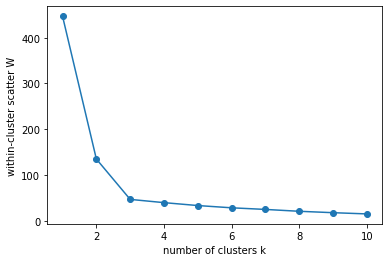

In [9]:
# function to calculate the aggregate distance for a range of k
def evaluate_all_k(data, max_k):
    # ...
    # insert code here
    # ...
    
    all_distance = []   
    for k in range(1, max_k+1):
        #centroids, distance, clusters = kmeans_clustering(data, k)
        _, distance, _ = kmeans_clustering(data, k)
        all_distance.append(np.array([k, distance]))
        
    return np.array(all_distance)   

# calculate distance for k=1...10
max_k = 10
all_distance = evaluate_all_k(data, max_k)

print(all_distance)

# plot aggregate distance against k
# ...
# insert code here
# ...
plt.plot(all_distance[:, 0], all_distance[:, 1], 'o-')

# label the axis
plt.xlabel('number of clusters k')
plt.ylabel('within-cluster scatter W')

# show plot
plt.show()